In [43]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
files = glob.glob('data/cleaned_data/*.csv')

payments = pd.concat([pd.read_csv(f, dtype={'commitmt_item_name': 'str', 'dept._descrptn': 'str', 'vendor_name': 'str'}) \
                      for f in files], sort=True)

In [13]:
payments.dtypes

check/payment_date    datetime64[ns]
commitmt_item_name            object
dept._descrptn                object
invoice_net_amt              float64
vendor_name                   object
dtype: object

In [7]:
payments.head()

,check/payment_date,commitmt_item_name,dept._descrptn,invoice_net_amt,vendor_name
0,2014-01-02,Inventories,Street Transportation,-34.78,3M COMPANY
1,2014-01-02,Inventories,Street Transportation,-69.55,3M COMPANY
2,2014-01-02,Inventories,Street Transportation,-77.00,3M COMPANY
3,2014-01-02,Inventories,Public Works,0.01,AGS SAFETY & SUPPLY
4,2014-01-02,Inventories,Police,-0.79,AMERICAN EUROCOPTER CORPORATION


In [12]:
# convert check/payment date into datetime, it was imported as an object

payments.iloc[:,0] = pd.to_datetime(payments.iloc[:,0])

In [16]:
# examine date range of data
print(payments.iloc[:,0].min())
print(payments.iloc[:,0].max())

2014-01-02 00:00:00
2018-12-31 00:00:00


In [8]:
# create Day_of_Year column to perform time series analysis over the year
phx_ven_pay_18['Day_of_Year'] = phx_ven_pay_18['Check/Payment Date'].dt.dayofyear

In [26]:
# find top vendors based on amounts paid over the year
top_vendors_by_payment_amount = payments.groupby('vendor_name')['invoice_net_amt'].sum() \
    .apply(lambda x: int(x/1000000)) \
    .sort_values(ascending=False) \
    .head(15)
top_vendors_by_payment_amount

vendor_name
US BANK TRUST NATIONAL ASSOCIATION    2710
VALLEY METRO RAIL INC                  440
TRANSDEV SERVICE INC                   437
HUNT AUSTIN A JOINT VENTURE            426
ARIZONA PUBLIC SERVICE CO              227
REGIONAL PUBLIC TRANSPORTATION         216
FIRST TRANSIT INC                      151
CENTRAL ARIZONA PROJECT                135
KIEWIT INFRASTRUCTURE WEST CO          110
GILLIG LLC                             102
PCL CONSTRUCTION INC                    98
JP MORGAN CHASE BANK                    95
HENSEL PHELPS CONSTRUCTION CO           93
NEW FLYER OF AMERICA                    91
TALIS CONSTRUCTION CORPORATION          91
Name: invoice_net_amt, dtype: int64

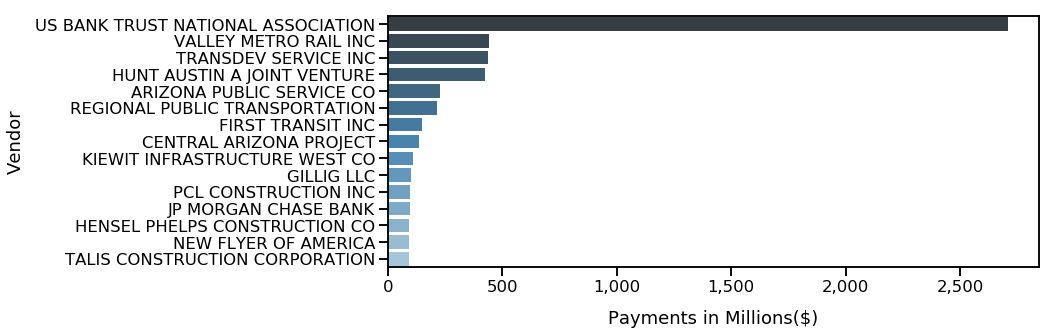

In [66]:
plt.subplots(figsize=(15,5))

sns.set_context('talk')
ax = sns.barplot(top_vendors_by_payment_amount.values, top_vendors_by_payment_amount.index, palette="Blues_d")

# plt.title('City of Phoenix Payments by Vendor',fontsize=20)
plt.ylabel('Vendor', labelpad=10)
plt.xlabel('Payments in Millions($)', labelpad=15)

ax.get_xaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()

plt.savefig("visualizations/top_vendors_payment_amt.png")

In [28]:
# which vendors have the highest volume of payments?
high_volume_vendors = payments.groupby('vendor_name')['invoice_net_amt'].count() \
    .sort_values(ascending=False) \
    .head(15)
high_volume_vendors

vendor_name
WIST OFFICE PRODUCTS CO              134624
GRAINGER                              76549
ARIZONA UNIFORM & APPAREL             50687
ARIZONA PUBLIC SERVICE CO             40991
COURTESY CHEVROLET                    31967
WAXIE SANITARY SPLY                   30140
STAR DISTRIBUTING CO                  29767
MISSION UNIFORM SERVICES              26634
COMMUNITY TIRE PROS & AUTO REPAIR     25742
BROWNS PARTSMASTER INC                24902
CREATIVE COMMUNICATIONS               22904
WESCO                                 21115
ELECTRIC SUPPLY INC                   18222
SIX POINTS HARDWARE/ELEC              17823
NATIONAL FIRE CONTROL                 17787
Name: invoice_net_amt, dtype: int64

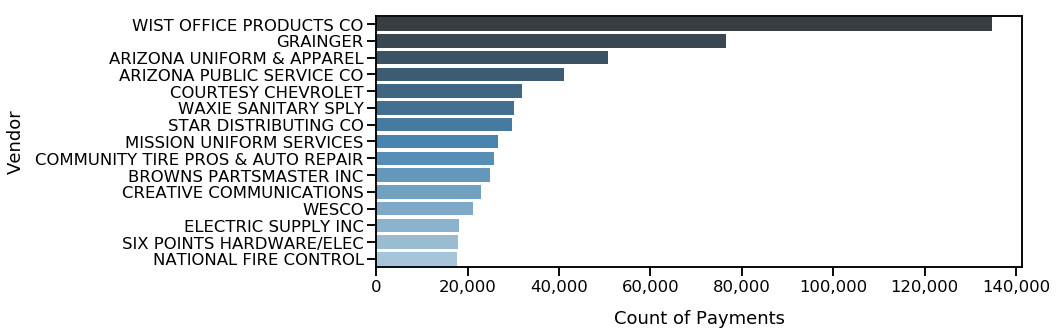

In [65]:
plt.subplots(figsize=(15,5))
sns.set_context('talk')
ax = sns.barplot(high_volume_vendors.values, high_volume_vendors.index, palette="Blues_d")

# plt.title('City of Phoenix Payment Count by Vendor',fontsize=20)
plt.ylabel('Vendor', labelpad=10)
plt.xlabel('Count of Payments', labelpad=15)

ax.get_xaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()

plt.savefig("visualizations/top_vendors_payment_volume.png")

In [35]:
# for the above vendors with the highest volume of payments, what is the mean payment value?

# subset dataset based on series I created above to identify top vendors by volume
high_volume_vendors_data = payments[payments['vendor_name'].str.contains('|'.join(high_volume_vendors.index))]

high_volume_vendors_data.groupby('vendor_name')['invoice_net_amt'].mean().sort_values(ascending=False)

vendor_name
INDEPENDENT ELECTRIC SUPPLY INC      8180.530000
ARIZONA PUBLIC SERVICE COMPANY       6291.500295
ARIZONA PUBLIC SERVICE CO            5539.248054
COURTESY CHEVROLET ALLY              5362.739286
COURTESY CHEVROLET                   1010.705817
COURTESY CHEVROLET GMAC               955.334850
WESCO                                 726.004386
WESCO DISTRIBUTION INC                539.489296
CREATIVE COMMUNICATIONS               450.409889
WAXIE SANITARY SPLY                   391.610263
ELECTRIC SUPPLY INC                   370.384610
COMMUNITY TIRE PROS & AUTO REPAIR     201.338781
BROWNS PARTSMASTER INC                170.893573
GRAINGER                              160.642572
SIX POINTS HARDWARE/ELEC              106.001680
STAR DISTRIBUTING CO                   60.831474
NATIONAL FIRE CONTROL                  57.924598
ARIZONA UNIFORM & APPAREL              49.347473
WIST OFFICE PRODUCTS CO                33.741824
MISSION UNIFORM SERVICES               15.846703
Name: in

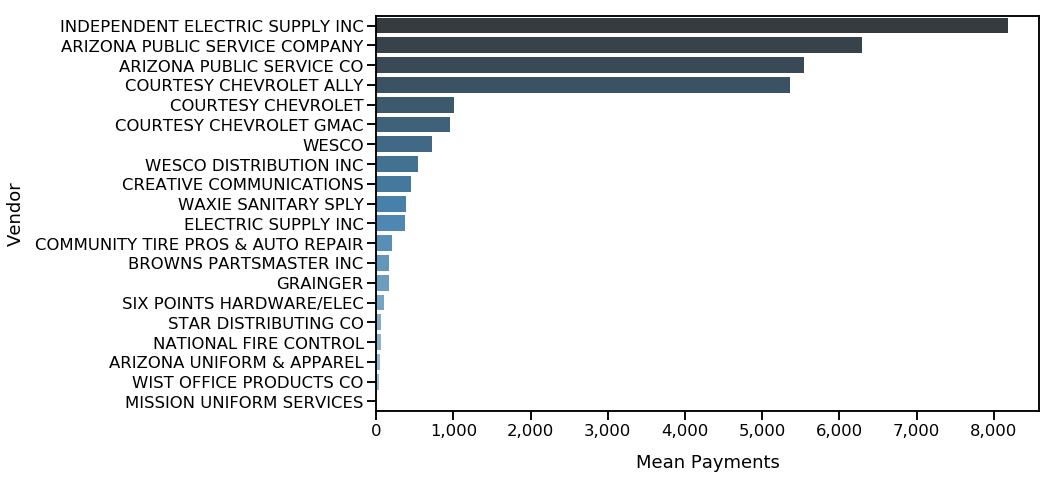

In [67]:
plt.subplots(figsize=(15,7))
sns.set_context("talk")

ax = sns.barplot(high_volume_vendors_data.groupby('vendor_name')['invoice_net_amt'].mean().sort_values(ascending=False)
.values, high_volume_vendors_data.groupby('vendor_name')['invoice_net_amt'].mean().sort_values(ascending=False)
.index, palette=("Blues_d"))

# plt.title('City of Phoenix Mean Payments - Top Volume Vendors')
plt.ylabel('Vendor', labelpad=10)
plt.xlabel('Mean Payments', labelpad=15)

ax.get_xaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()

plt.savefig("visualizations/top_vendors_volume_mean_payments.png")

#### why are there two different names for APS above?
#### why does Phoenix use multiple uniform service companies?

### Note for future analysis, using .agg() function to find a number of pieces of information for anything being grouped. Rather than group and perform one specific type of analysis

In [39]:
x = phx_ven_pay_18.groupby('Vendor Name')['Invoice Net Amt'] \
    .agg(['mean', 'sum', 'min', 'max', 'std', 'count']) \
    .sort_values(by='sum', ascending=False) \
    .head()

# format data as currency with two decimal places
x.style.format('${0:,.2f}')


,mean,sum,min,max,std,count
Vendor Name,,,,,,
US BANK TRUST NATIONAL ASSOCIATION,"$1,572,011.33","$556,492,009.88",$123.20,"$55,205,000.00","$4,040,197.64",$354.00
VALLEY METRO RAIL INC,"$796,824.00","$147,412,440.70",$83.00,"$11,327,663.00","$1,408,475.01",$185.00
HUNT AUSTIN A JOINT VENTURE,"$5,271,310.41","$142,325,381.00","$16,508.00","$12,692,493.00","$4,904,608.72",$27.00
TRANSDEV SERVICE INC,"$630,058.30","$110,890,260.34",$-0.88,"$7,981,228.75","$1,798,725.64",$176.00
HENSEL PHELPS CONSTRUCTION CO,"$2,847,291.70","$76,876,876.00","$1,520.00","$9,191,601.00","$3,120,149.80",$27.00
